In [27]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
os.chdir("C:\\Users\\HP\\Desktop\\code challenges\\datasets")

In [6]:
df = pd.read_csv("BostonHousing.csv")

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
X = df.drop(columns=['medv'])
y = df['medv']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()

In [19]:
rfe = RFE(model, n_features_to_select=5)

In [20]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [21]:
X_train_rfe = X_train.loc[:, rfe.support_]
X_test_rfe = X_test.loc[:, rfe.support_]

In [22]:
model.fit(X_train_rfe, y_train)

LinearRegression()

In [23]:
y_pred_rfe = model.predict(X_test_rfe)

In [26]:
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
print(f'RFE Mean Squared Error: {mse_rfe}')

RFE Mean Squared Error: 33.496625240913566


In [28]:
lasso = Lasso(alpha=0.1)

In [29]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [30]:
selected_features = X_train.columns[(lasso.coef_ != 0)]
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

In [31]:
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.1)

In [32]:
y_pred_lasso = lasso.predict(X_test_lasso)

In [33]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'LASSO Mean Squared Error: {mse_lasso}')

LASSO Mean Squared Error: 25.15559375393417


In [34]:
model_full = LinearRegression()
model_full.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred_full = model_full.predict(X_test)

In [36]:
mse_full = mean_squared_error(y_test, y_pred_full)
print(f'Original Data Mean Squared Error: {mse_full}')

Original Data Mean Squared Error: 24.29111947497344


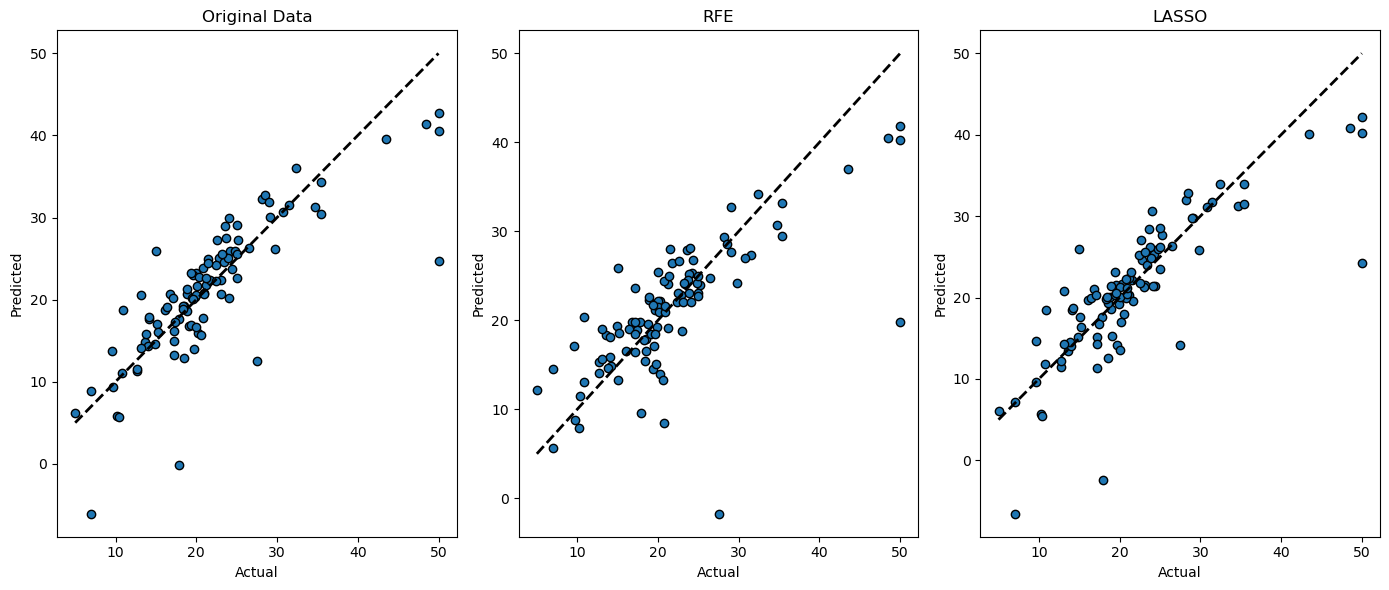

In [39]:
plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_full, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Original Data')


plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rfe, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RFE')


plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LASSO')

plt.tight_layout()
plt.show()